In [1]:
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import pandas
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow

In [3]:
matlabData = sio.loadmat(file_name='data/s2_sl2p_weiss_or_prosail_inout.mat', variable_names=['Input', 'Output'])

In [4]:
inputDF = pandas.DataFrame(data=matlabData['Input']['Rho_Toc'][0][0])
inputAngles = pandas.DataFrame(data=matlabData['Input']['Angles'][0][0])

inputDF = pandas.concat([inputDF, inputAngles], axis=1, join='outer', ignore_index=True)
inputDF.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3']

LAI = pandas.Series(data=matlabData['Output']['LAI'][0][0].flatten())
FAPAR = pandas.Series(data=matlabData['Output']['FAPAR'][0][0].flatten())
FCOVER = pandas.Series(data=matlabData['Output']['FCOVER'][0][0].flatten())

LAI_mean = LAI.mean()
FAPAR_mean = FAPAR.mean()
FCOVER_mean = FCOVER.mean()

outputCSV = pandas.concat([inputDF, LAI, FAPAR, FCOVER], axis=1, join='outer')
outputCSV['latitude'] = 0
outputCSV['longitude'] = 0
outputCSV.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 
                     'LAI', 'FAPAR', 'FCOVER', 'latitude', 'longitude']
outputCSV

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,latitude,longitude
0,0.048953,0.030271,0.073742,0.294630,0.419698,0.436037,0.121603,0.043615,0.994435,0.853211,0.994632,6.014594,0.870412,0.875424,0,0
1,0.053655,0.029552,0.074523,0.383288,0.566787,0.597187,0.180981,0.054689,0.974949,0.899428,-0.974783,5.752335,0.957268,0.971936,0,0
2,0.075767,0.092849,0.144840,0.267414,0.306598,0.321708,0.254556,0.145838,0.970282,0.901471,0.982456,0.746137,0.386350,0.394260,0,0
3,0.071742,0.031115,0.094643,0.303518,0.383710,0.391068,0.118468,0.047038,0.987971,0.865112,-0.997234,5.374681,0.819419,0.830017,0,0
4,0.100043,0.028230,0.130998,0.442701,0.560120,0.563746,0.182785,0.062757,0.961521,0.385027,0.490117,5.467322,0.899630,0.927706,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41467,0.091781,0.028950,0.124602,0.420813,0.528081,0.544847,0.122709,0.032790,0.979430,0.704338,0.746313,4.951841,0.922245,0.949148,0,0
41468,0.046467,0.034942,0.069040,0.229278,0.308859,0.321834,0.126807,0.071680,0.994707,0.654700,-0.672963,4.453112,0.717015,0.714964,0,0
41469,0.045621,0.027923,0.067862,0.307144,0.445989,0.474847,0.162763,0.055750,0.999777,0.576598,-0.587336,4.579922,0.861480,0.871602,0,0
41470,0.053039,0.037354,0.081990,0.340293,0.506438,0.528001,0.190817,0.076028,0.988945,0.729268,0.771352,5.502935,0.879030,0.882815,0,0


In [4]:
outputCSV.to_csv(path_or_buf=r'rawFeatures.csv')

In [5]:
LAI = pandas.Series(data=matlabData['Output']['LAI'][0][0].flatten())
FAPAR = pandas.Series(data=matlabData['Output']['FAPAR'][0][0].flatten())
FCOVER = pandas.Series(data=matlabData['Output']['FCOVER'][0][0].flatten())

LAI_mean = LAI.mean()
FAPAR_mean = FAPAR.mean()
FCOVER_mean = FCOVER.mean()

LAI = LAI.subtract(LAI_mean)
FAPAR = FAPAR.subtract(FAPAR_mean)
FCOVER = FCOVER.subtract(FCOVER_mean)

In [6]:
inputDF = pandas.DataFrame(data=matlabData['Input']['Rho_Toc'][0][0])
inputAngles = pandas.DataFrame(data=matlabData['Input']['Angles'][0][0])

inputDF = pandas.concat([inputDF, inputAngles], axis=1, join='outer', ignore_index=True)
inputDF.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3']

inputDF = inputDF - inputDF.mean()
inputDF = inputDF * inputDF.pow(2).sum().pow(-0.5)

In [7]:
LAImodel = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAImodel = LAImodel.fit(inputDF, LAI)

FAPARmodel = sklearn.linear_model.Lars(n_nonzero_coefs=3)
FAPARmodel = FAPARmodel.fit(inputDF, FAPAR)

FCOVERmodel = sklearn.linear_model.Lars(fit_intercept=False, n_nonzero_coefs=3)
FCOVERmodel = FCOVERmodel.fit(inputDF, FCOVER)

In [8]:
LAI_predicted = pandas.Series(LAImodel.predict(inputDF))
FAPAR_predicted = pandas.Series(FAPARmodel.predict(inputDF))
FCOVER_predicted = pandas.Series(FCOVERmodel.predict(inputDF))

In [9]:
LAI_RMSE = sklearn.metrics.mean_squared_error(LAI, LAI_predicted, squared=False)
FAPAR_RMSE = sklearn.metrics.mean_squared_error(FAPAR, FAPAR_predicted, squared=False)
FCOVER_RMSE = sklearn.metrics.mean_squared_error(FCOVER, FCOVER_predicted, squared=False)

print('LAI Coefficient Path - RMSE: {}'.format(LAI_RMSE))
print(pandas.DataFrame(LAImodel.coef_path_))
print()

print('FAPAR Coefficient Path - RMSE: {}'.format(FAPAR_RMSE))
print(pandas.DataFrame(FAPARmodel.coef_path_))
print()

print('FCOVER Coefficient Path - RMSE: {}'.format(FCOVER_RMSE))
print(pandas.DataFrame(FCOVERmodel.coef_path_))
print()

LAI Coefficient Path - RMSE: 1.258700176689138
      0          1          2           3           4
0   0.0   0.000000   0.000000    0.000000    0.000000
1   0.0   0.000000   0.000000  -28.130473   17.592608
2   0.0   0.000000   0.000000    0.000000  -55.195770
3   0.0   0.000000   0.000000    0.000000    0.000000
4   0.0  65.151139  99.425893  181.077028  226.586317
5   0.0   0.000000   0.000000    0.000000    0.000000
6   0.0   0.000000   0.000000    0.000000    0.000000
7   0.0   0.000000 -34.274754  -94.992055 -110.249060
8   0.0   0.000000   0.000000    0.000000    0.000000
9   0.0   0.000000   0.000000    0.000000    0.000000
10  0.0   0.000000   0.000000    0.000000    0.000000

FAPAR Coefficient Path - RMSE: 0.0610922729519303
      0          1          2          3
0   0.0   0.000000   0.000000   0.000000
1   0.0   0.000000  -6.460423 -10.649835
2   0.0   0.000000   0.000000   0.000000
3   0.0   0.000000   0.000000   0.000000
4   0.0   0.000000   0.000000   0.000000
5   0.0 

In [10]:
LAI_features = numpy.nonzero(LAImodel.coef_)[0]
FAPAR_features = numpy.nonzero(FAPARmodel.coef_)[0]
FCOVER_features = numpy.nonzero(FCOVERmodel.coef_)[0]

LAI_features = inputDF.columns[LAI_features]
FAPAR_features = inputDF.columns[FAPAR_features]
FCOVER_features = inputDF.columns[FCOVER_features]

In [12]:
[len(inputDF[LAI_features].keys())]

[4]

In [227]:
LAI_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.sigmoid, 
                                  input_shape=[len(inputDF[LAI_features].keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.sigmoid),
    tensorflow.keras.layers.Dense(1)
])
LAI_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])


FAPAR_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.sigmoid, 
                                  input_shape=[len(inputDF[FAPAR_features].keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.sigmoid),
    tensorflow.keras.layers.Dense(1)
])
FAPAR_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])


FCOVER_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.sigmoid, 
                                  input_shape=[len(inputDF[FCOVER_features].keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.sigmoid),
    tensorflow.keras.layers.Dense(1)
])

FCOVER_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [228]:
LAI_model.fit(x = inputDF[LAI_features], y = LAI, epochs = 100, validation_split = 0.2)
FAPAR_model.fit(x = inputDF[FAPAR_features], y = FAPAR, epochs = 20, validation_split = 0.2)
FCOVER_model.fit(x = inputDF[FCOVER_features], y = FCOVER, epochs = 20, validation_split = 0.2)

Train on 33177 samples, validate on 8295 samples
Epoch 1/100
33177/33177 [==============================] - 4s 127us/sample - loss: 4.7573 - mse: 4.7573 - mae: 1.7692 - val_loss: 4.9883 - val_mse: 4.9883 - val_mae: 1.7986
Epoch 2/100
33177/33177 [==============================] - 4s 109us/sample - loss: 4.7355 - mse: 4.7355 - mae: 1.7664 - val_loss: 4.9634 - val_mse: 4.9634 - val_mae: 1.8066
Epoch 3/100
33177/33177 [==============================] - 4s 107us/sample - loss: 4.6909 - mse: 4.6909 - mae: 1.7585 - val_loss: 4.9088 - val_mse: 4.9088 - val_mae: 1.7706
Epoch 4/100
33177/33177 [==============================] - 4s 121us/sample - loss: 4.5730 - mse: 4.5730 - mae: 1.7336 - val_loss: 4.6949 - val_mse: 4.6949 - val_mae: 1.7419
Epoch 5/100
33177/33177 [==============================] - 4s 116us/sample - loss: 4.2581 - mse: 4.2581 - mae: 1.6684 - val_loss: 4.2265 - val_mse: 4.2265 - val_mae: 1.6257
Epoch 6/100
33177/33177 [==============================] - 4s 109us/sample - loss: 3.5

In [229]:
LAI_predictions = pandas.Series(LAI_model.predict(inputDF[LAI_features]).flatten())
FAPAR_predictions = pandas.Series(FAPAR_model.predict(inputDF[FAPAR_features]).flatten())
FCOVER_predictions = pandas.Series(FCOVER_model.predict(inputDF[FCOVER_features]).flatten())

In [230]:
LAI += LAI_mean
LAI_predicted += LAI_mean
LAI_predictions += LAI_mean

FAPAR += FAPAR_mean
FAPAR_predicted += FAPAR_mean
FAPAR_predictions += FAPAR_mean

FCOVER += FCOVER_mean
FCOVER_predicted += FCOVER_mean
FCOVER_predictions += FCOVER_mean

In [ ]:
LAI -= LAI_mean
LAI_predicted -= LAI_mean
LAI_predictions -= LAI_mean

FAPAR -= FAPAR_mean
FAPAR_predicted -= FAPAR_mean
FAPAR_predictions -= FAPAR_mean

FCOVER -= FCOVER_mean
FCOVER_predicted -= FCOVER_mean
FCOVER_predictions -= FCOVER_mean

In [231]:
xy_skl_LAI = numpy.vstack([LAI, LAI_predicted])
xy_tf_LAI = numpy.vstack([LAI, LAI_predictions])
xy_skl_FAPAR = numpy.vstack([FAPAR, FAPAR_predicted])
xy_tf_FAPAR = numpy.vstack([FAPAR, FAPAR_predictions])
xy_skl_FCOVER = numpy.vstack([FCOVER, FCOVER_predicted])
xy_tf_FCOVER = numpy.vstack([FCOVER, FCOVER_predictions])

In [232]:
z_skl_LAI = scipy.stats.gaussian_kde(xy_skl_LAI)(xy_skl_LAI)
z_tf_LAI = scipy.stats.gaussian_kde(xy_tf_LAI)(xy_tf_LAI)
z_skl_FAPAR = scipy.stats.gaussian_kde(xy_skl_FAPAR)(xy_skl_FAPAR)
z_tf_FAPAR = scipy.stats.gaussian_kde(xy_tf_FAPAR)(xy_tf_FAPAR)
z_skl_FCOVER = scipy.stats.gaussian_kde(xy_skl_FCOVER)(xy_skl_FCOVER)
z_tf_FCOVER = scipy.stats.gaussian_kde(xy_tf_FCOVER)(xy_tf_FCOVER)

In [233]:
idx_skl_LAI = z_skl_LAI.argsort()
idx_tf_LAI = z_tf_LAI.argsort()
idx_skl_FAPAR = z_skl_FAPAR.argsort()
idx_tf_FAPAR = z_tf_FAPAR.argsort()
idx_skl_FCOVER = z_skl_FCOVER.argsort()
idx_tf_FCOVER = z_tf_FCOVER.argsort()

In [234]:
x_skl_LAI = LAI[idx_skl_LAI]
x_tf_LAI = LAI[idx_tf_LAI]
x_skl_FAPAR = FAPAR[idx_skl_FAPAR]
x_tf_FAPAR = FAPAR[idx_tf_FAPAR]
x_skl_FCOVER = FCOVER[idx_skl_FCOVER]
x_tf_FCOVER = FCOVER[idx_tf_FCOVER]

In [235]:
y_skl_LAI = LAI_predicted[idx_skl_LAI]
y_tf_LAI = LAI_predictions[idx_tf_LAI]
y_skl_FAPAR = FAPAR_predicted[idx_skl_FAPAR]
y_tf_FAPAR = FAPAR_predictions[idx_tf_FAPAR]
y_skl_FCOVER = FCOVER_predicted[idx_skl_FCOVER]
y_tf_FCOVER = FCOVER_predictions[idx_tf_FCOVER]

In [236]:
z_skl_LAI = z_skl_LAI[idx_skl_LAI]
z_tf_LAI = z_tf_LAI[idx_tf_LAI]
z_skl_FAPAR = z_skl_FAPAR[idx_skl_FAPAR]
z_tf_FAPAR = z_tf_FAPAR[idx_tf_FAPAR]
z_skl_FCOVER = z_skl_FCOVER[idx_skl_FCOVER]
z_tf_FCOVER = z_tf_FCOVER[idx_tf_FCOVER]

In [237]:
rmse_skl_LAI = sklearn.metrics.mean_squared_error(x_skl_LAI, y_skl_LAI, squared=False)
rmse_tf_LAI = sklearn.metrics.mean_squared_error(x_tf_LAI, y_tf_LAI, squared=False)
rmse_skl_FAPAR = sklearn.metrics.mean_squared_error(x_skl_FAPAR, y_skl_FAPAR, squared=False)
rmse_tf_FAPAR = sklearn.metrics.mean_squared_error(x_tf_FAPAR, y_tf_FAPAR, squared=False)
rmse_skl_FCOVER = sklearn.metrics.mean_squared_error(x_skl_FCOVER, y_skl_FCOVER, squared=False)
rmse_tf_FCOVER = sklearn.metrics.mean_squared_error(x_tf_FCOVER, y_tf_FCOVER, squared=False)

In [238]:
a_skl_LAI = numpy.linspace(0, 6, 1000)
a_tf_LAI = numpy.linspace(0, 10, 1000)
a_skl_FAPAR = numpy.linspace(0, 1, 1000)
a_tf_FAPAR = numpy.linspace(0, 1, 1000)
a_skl_FCOVER = numpy.linspace(0, 1, 1000)
a_tf_FCOVER = numpy.linspace(0, 1, 1000)

Text(0.5, 1.0, 'NNet FCOVER - RMSE: 0.05295730774146156')

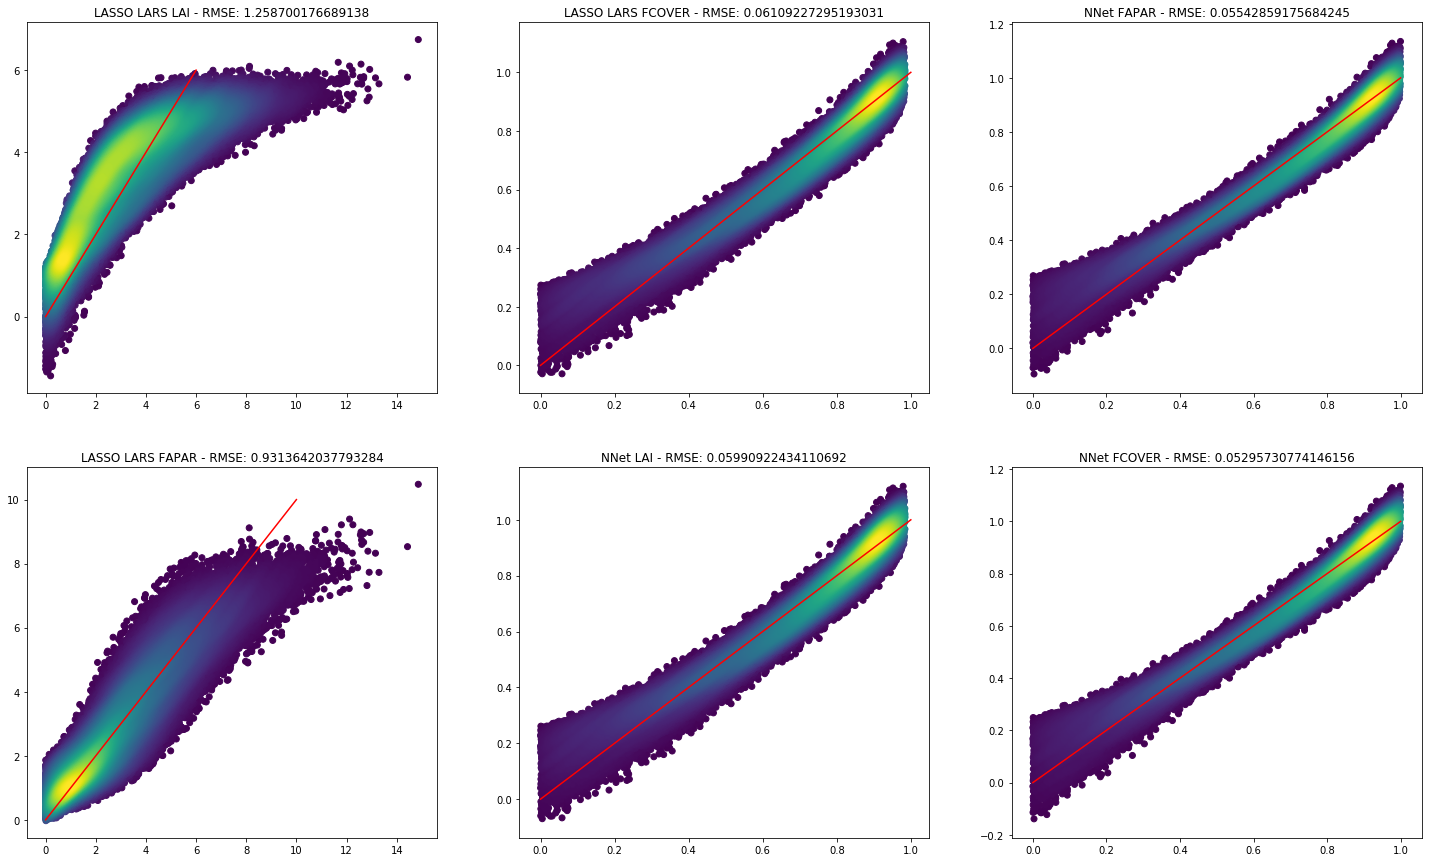

In [239]:
fig, ax = plt.subplots(2, 3, figsize=(25,15))


ax[0,0].scatter(x_skl_LAI, y_skl_LAI, c=z_skl_LAI)
ax[0,0].plot(a_skl_LAI, a_skl_LAI, c='r')
ax[0,0].set_title('LASSO LARS LAI - RMSE: {}'.format(rmse_skl_LAI))


ax[1,0].scatter(x_tf_LAI, y_tf_LAI, c=z_tf_LAI)
ax[1,0].plot(a_tf_LAI, a_tf_LAI, c='r')
ax[1,0].set_title('LASSO LARS FAPAR - RMSE: {}'.format(rmse_tf_LAI))


ax[0,1].scatter(x_skl_FAPAR, y_skl_FAPAR, c=z_skl_FAPAR)
ax[0,1].plot(a_skl_FAPAR, a_skl_FAPAR, c='r')
ax[0,1].set_title('LASSO LARS FCOVER - RMSE: {}'.format(rmse_skl_FAPAR))


ax[1,1].scatter(x_tf_FAPAR, y_tf_FAPAR, c=z_tf_FAPAR)
ax[1,1].plot(a_tf_FAPAR, a_tf_FAPAR, c='r')
ax[1,1].set_title('NNet LAI - RMSE: {}'.format(rmse_tf_FAPAR))


ax[0,2].scatter(x_skl_FCOVER, y_skl_FCOVER, c=z_skl_FCOVER)
ax[0,2].plot(a_skl_FCOVER, a_skl_FCOVER, c='r')
ax[0,2].set_title('NNet FAPAR - RMSE: {}'.format(rmse_skl_FCOVER))


ax[1,2].scatter(x_tf_FCOVER, y_tf_FCOVER, c=z_tf_FCOVER)
ax[1,2].plot(a_tf_FCOVER, a_tf_FCOVER, c='r')
ax[1,2].set_title('NNet FCOVER - RMSE: {}'.format(rmse_tf_FCOVER))